<a href="https://colab.research.google.com/github/yokenien1124/Yolov3/blob/main/Testing_Detection_(Towerlight)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Import Libraries

In [ ]:
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import files
import pytz
from datetime import datetime
%matplotlib inline

print("Done importing...")

Done importing...


# Load Yolov3 and Own Custom Weights

In [ ]:
# Load the class labels in which the YOLO model was trained on
labelsPath = os.path.join("/content/drive/MyDrive/Towerlight/towerlight.names")
LABELS = open(labelsPath).read().strip().split("\n")
#print class names
print(LABELS)

weightsPath = os.path.join("/content/drive/MyDrive/Towerlight/backup/yolov3_custom_1100.weights")
configPath = os.path.join("/content/drive/MyDrive/Towerlight/yolov3_custom.cfg")

# Loading the neural network framework Darknet (YOLO was created based on this framework)
net = cv2.dnn.readNetFromDarknet(configPath,weightsPath)

['Alarm', 'Emergency', 'Offline', 'Run', 'Standby']


Display function to show image on the notebook

In [ ]:
# display function to show image 
def display_img(img,cmap=None):
    fig = plt.figure(figsize = (12,12))
    plt.axis("Off")
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

# Perform Prediction for the image

Create a function for predicting the input

In [ ]:
# Create the function which predict the frame input
def prediction(img):
    
    # initialize a list of colors to represent each possible class label
    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
    (H, W) = img.shape[:2]

    # determine only the "ouput" layers name which we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    # construct a blob from the input image and then perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln)
    end = time.time()
    
    print("[INFO] YOLO took {:.6f} seconds".format(end - start))

    boxes = []
    confidences = []
    classIDs = []
    threshold = 0.3

    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            # confidence type=float, default=0.5
            if confidence > threshold:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)



    # apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.1)

    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # draw a bounding box rectangle and label on the image
            color = (255,0,0) #red
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(img, text, (x + 15, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    print(classIDs, confidences)
    print("Class Name: ",LABELS[classIDs[i]])

    return img

# Let's try to apply on image

Just hover on the square bracket [ ] then click on the play icon of the cell to run only that cell.


[INFO] YOLO took 1.827271 seconds
[4] [0.6310579180717468]
Class Name:  Standby


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


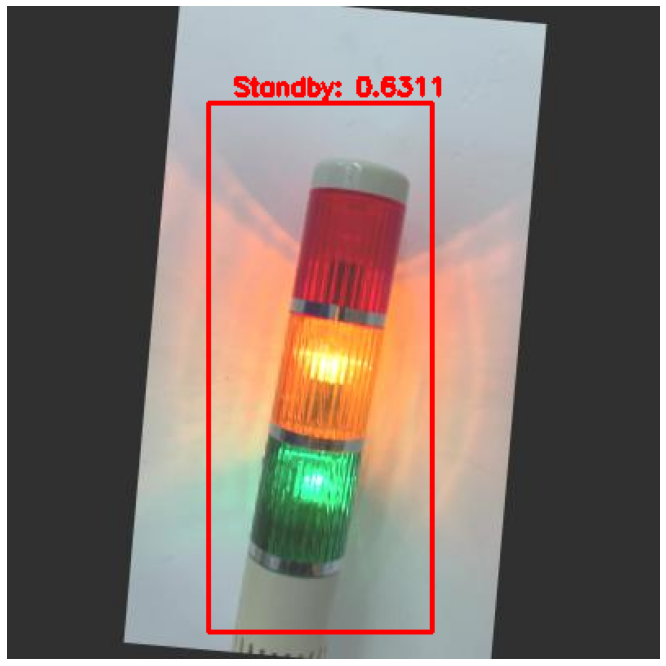

In [ ]:
#img = cv2.imread("/content/drive/MyDrive/Towerlight/Image/OFFLINE3.jpg")
#img = cv2.imread("/content/drive/MyDrive/Towerlight/Image/RUN20.jpg")
#img = cv2.imread("/content/drive/MyDrive/Towerlight/Image/ALARM14.jpg")
img = cv2.imread("/content/drive/MyDrive/Towerlight/Image/STANDBY21.jpg")
#img = cv2.imread("/content/drive/MyDrive/Towerlight/Image/EMERGENCY12.jpg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.show()
result = display_img(prediction(img))


**If want to upload own image**

Upload function is created for the user to upload own image for the prediction

In [ ]:
def upload():
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file',name)
      
      img = cv2.imread(name)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      result = display_img(prediction(img))

Saving EMERGENCY (8).jpg to EMERGENCY (8).jpg
saved file EMERGENCY (8).jpg
[INFO] YOLO took 2.083965 seconds
[1] [0.899618923664093]
['Alarm', 'Emergency', 'Offline', 'Run', 'Standby']


2021-04-28 22:16:00.840174+08:00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


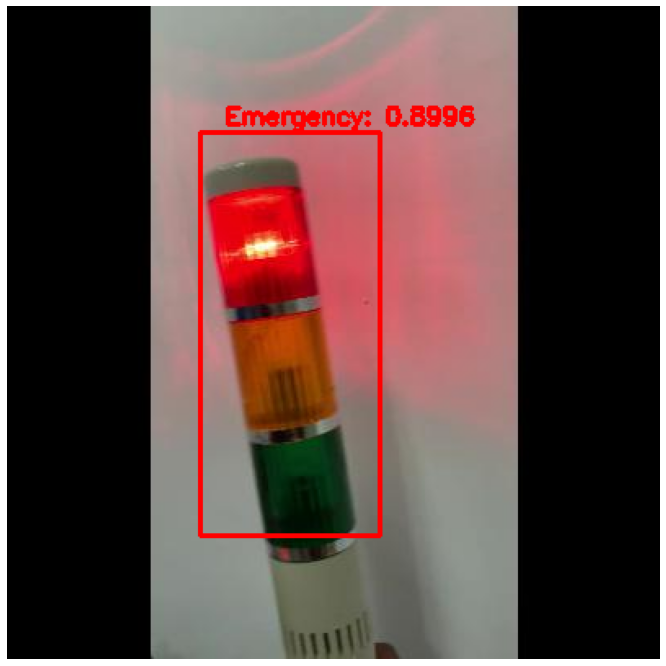

In [ ]:
#Please upload an image file such as .jpg and .jpeg
upload()

my_date = datetime.now(pytz.timezone('Asia/Kuala_Lumpur'))
print("\n")
print(my_date) 